# Project 3.  Due October 31

In [8]:
import sys
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy.linalg as LA

### The attached file, 'polluteddata.csv', contains the following data.
### We took intraday price values for an asset; this time series was then split into half-hour intervals for a total of 1709 intervals

In [9]:
data = pd.read_csv('polluteddata.csv',header=None)
polluteddata = data.to_numpy()

In [10]:
data

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
0,0.0,0.0,-3.00,-8.26,-10.55,-8.56,-18.08,-12.67,-14.29,-16.08,...,-27.58,-31.51,-27.53,-25.24,-25.32,-24.44,-28.04,-30.94,-29.57,-27.56
1,1.0,0.0,0.12,-0.41,-2.56,0.15,-1.65,-5.14,-5.09,-8.06,...,-6.65,-5.43,-6.13,-3.42,-4.48,-4.85,-4.47,-4.68,-2.10,-0.28
2,2.0,0.0,-2.80,-3.46,-5.80,-3.86,-2.60,-5.30,-4.81,-3.30,...,-12.74,-13.02,-15.99,-14.15,-14.92,-16.80,-16.88,-19.53,-25.30,-19.60
3,3.0,0.0,-1.95,-9.58,-13.68,-13.64,-18.36,-22.33,-15.70,-16.69,...,-19.50,-17.76,-18.52,-20.12,-17.35,-14.18,-15.57,-15.42,-19.58,-17.68
4,4.0,0.0,-1.11,1.62,-0.34,-5.76,-2.53,-0.56,1.45,0.62,...,0.49,-3.04,-0.82,-8.32,-3.87,-10.33,-11.46,-8.94,-16.81,-16.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704,1704.0,0.0,0.38,-0.73,-3.09,-2.31,-2.46,-7.22,-5.85,-4.63,...,-23.96,-19.09,-17.55,-23.27,-20.66,-18.36,-18.05,-16.96,-21.37,-25.62
1705,1705.0,0.0,-3.21,-9.32,-2.90,-7.39,-8.25,1.42,1.40,2.22,...,4.42,4.05,1.48,-7.24,-7.92,-15.95,-18.73,-14.73,-12.64,-12.91
1706,1706.0,0.0,-0.83,1.65,2.19,1.62,0.45,0.63,4.18,4.02,...,18.51,18.66,16.63,14.55,16.01,13.66,15.52,15.37,16.70,12.52
1707,1707.0,0.0,0.34,-0.90,-2.51,-2.15,-4.72,-4.57,-7.59,-5.22,...,0.95,3.28,-0.92,0.28,-2.47,-7.22,-9.03,-10.33,-12.30,-16.24


In [11]:
data.shape

(1709, 31)

### There are 1709 lines in this file, one for each half-hour interval.  Each line begins with the count of the corresponding half-hour

In [12]:
for t in range(3): #len(polluteddata[0,:])):
    print('half-hour',t, 'data:',polluteddata[t,:])

half-hour 0 data: [  0.     0.    -3.    -8.26 -10.55  -8.56 -18.08 -12.67 -14.29 -16.08
 -20.04 -15.81 -14.56 -17.34 -20.14 -15.96 -14.3  -15.82 -15.07 -12.39
 -20.65 -27.58 -31.51 -27.53 -25.24 -25.32 -24.44 -28.04 -30.94 -29.57
 -27.56]
half-hour 1 data: [  1.     0.     0.12  -0.41  -2.56   0.15  -1.65  -5.14  -5.09  -8.06
  -9.05 -14.9  -18.27 -16.18 -15.42 -13.8  -12.89 -12.87 -10.18 -12.7
  -9.21  -6.65  -5.43  -6.13  -3.42  -4.48  -4.85  -4.47  -4.68  -2.1
  -0.28]
half-hour 2 data: [  2.     0.    -2.8   -3.46  -5.8   -3.86  -2.6   -5.3   -4.81  -3.3
  -0.28   1.33   0.68   2.3    1.65  -9.32 -11.74 -11.49 -19.37 -11.8
 -10.87 -12.74 -13.02 -15.99 -14.15 -14.92 -16.8  -16.88 -19.53 -25.3
 -19.6 ]


### The data was constructed as follows for each half hour interval $t$.  Suppose that $p(t, k)$ denotes the price of the asset in minute $k$ of half-hour $t$.  Here $k = 0,1,\ldots, 29$.  
### The data in position $k+1$ of line $t$ of the file equals $p(t,k) - p(t,0)$, i.e. the change in price between minute $k$ and minute $0$.

### EXCEPT that:
### The data was <font color = "red">polluted</font> in a <font color = "red">significant and correlated</font> manner during a certain <font color = "red"> interval $[t_1, t_2]$ </font> of half-hours.
### Your task is to identify this interval $[t_1, t_2]$ as closely as possible, using <font color = "red">covariance analysis techniques</font>.
### Please use power method if you want to find the largest eigenvalue and its corresponding eigenvector for certain matrices.
### Please note that we are not interested in small, random noise.  We are looking for a large change in the covariance structure.

,adf_stat,p_value,stationary,constant
col,,,,
m1,NaN,NaN,None,True
m2,-40.849776,0.000000e+00,True,False
m3,-8.002288,2.316649e-12,True,False
m4,-7.242443,1.869088e-10,True,False
m5,-22.257684,0.000000e+00,True,False
m6,-17.405030,4.922298e-30,True,False
m7,-39.753010,0.000000e+00,True,False
m8,-8.597247,7.023276e-14,True,False
m9,-10.149331,8.028274e-18,True,False


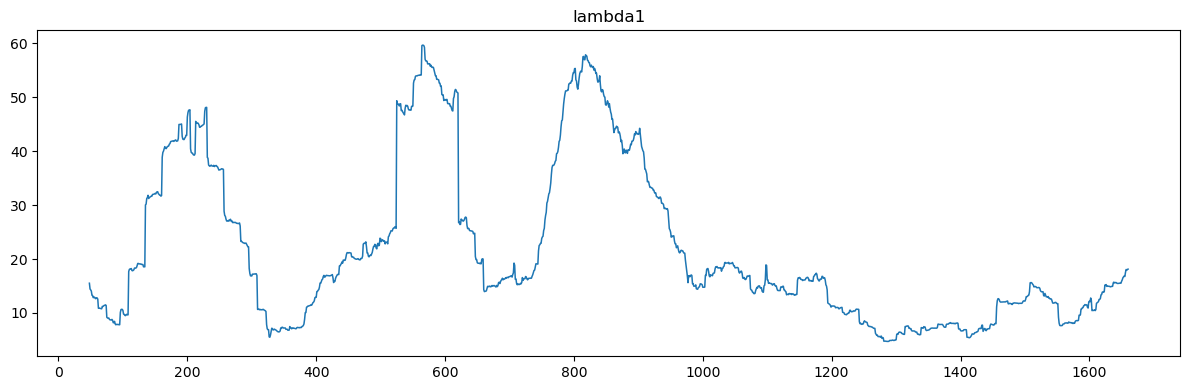

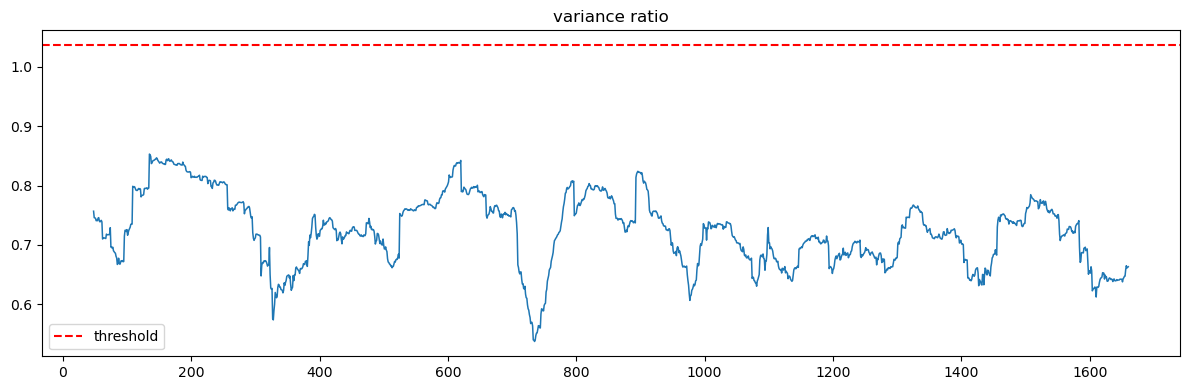

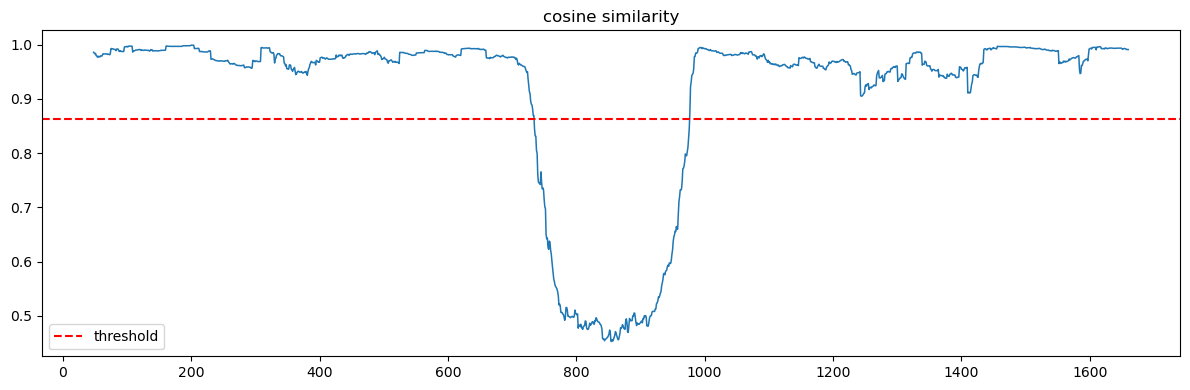

KMeans silhouette: 0.7381562236404752
In-sample R2 (normal): nan
Out-of-sample OSR2 (anomaly): nan
Detected segments [t1, t2]: []


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import norm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller

def adf_check_robust(df_30cols, alpha=0.05, min_std=1e-8, min_unique=3, dropna=True):
    rows = []
    for c in df_30cols.columns:
        s = pd.to_numeric(df_30cols[c], errors='coerce')
        if dropna:
            s = s.dropna()
        vals = s.values.astype(float)
        uniq = np.unique(vals[~np.isnan(vals)])
        stdv = np.nanstd(vals)
        if len(uniq) < min_unique or stdv < min_std:
            rows.append({'col': c, 'adf_stat': np.nan, 'p_value': np.nan,
                         'stationary': None, 'constant': True})
            continue
        try:
            stat, p, _, _, _, _ = adfuller(vals, autolag='AIC')
            rows.append({'col': c, 'adf_stat': float(stat), 'p_value': float(p),
                         'stationary': bool(p < alpha), 'constant': False})
        except Exception:
            rows.append({'col': c, 'adf_stat': np.nan, 'p_value': np.nan,
                         'stationary': None, 'constant': False})
    return pd.DataFrame(rows).set_index('col')

def power_method(Sigma, max_iter=100, tol=1e-7):
    d = Sigma.shape[0]
    x = np.random.randn(d); x /= (norm(x)+1e-12)
    last = x.copy()
    for _ in range(max_iter):
        y = Sigma @ x
        ny = norm(y)
        if ny < 1e-20:
            break
        x = y / ny
        if norm(x - last) < tol:
            break
        last = x
    lam = float(x.T @ Sigma @ x)
    return lam, x

def sliding_cov_pca(X_std, W=96, eps=1e-8, baseline_span=256):
    T, d = X_std.shape
    half = W // 2
    t_list, lambda1, var_ratio, v_list = [], [], [], []
    for t in range(half, T - half):
        if W % 2 == 0:
            Xw = X_std[t - half: t + half]
        else:
            Xw = X_std[t - half: t + half + 1]
        Xw = Xw - Xw.mean(axis=0, keepdims=True)
        Sigma = (Xw.T @ Xw) / max(1, (len(Xw) - 1))
        Sigma = Sigma + eps * np.eye(d)
        lam1, v1 = power_method(Sigma)
        trS = np.trace(Sigma)
        t_list.append(t)
        lambda1.append(lam1)
        var_ratio.append(lam1 / trS if trS > 1e-20 else 0.0)
        v_list.append(v1)
    K = min(baseline_span, len(v_list))
    v_bar = np.mean(np.stack(v_list[:K], axis=0), axis=0)
    v_bar = v_bar / (norm(v_bar)+1e-12)
    cos_sim = []
    for v in v_list:
        c = float(np.dot(v, v_bar) / ((norm(v)*norm(v_bar))+1e-12))
        cos_sim.append(abs(np.clip(c, -1.0, 1.0)))
    return np.array(t_list), np.array(lambda1), np.array(var_ratio), np.array(cos_sim), v_bar

def robust_upper(x, k=5.0):
    med = np.median(x)
    mad = np.median(np.abs(x - med)) + 1e-12
    return med + k * 1.4826 * mad

def robust_lower(x, k=5.0):
    med = np.median(x)
    mad = np.median(np.abs(x - med)) + 1e-12
    return med - k * 1.4826 * mad

def detect_intervals(signal, thr, min_len, mode='above'):
    """
    mode='above'检测 signal>thr，mode='below'检测 signal<thr
    """
    if mode == 'above':
        flags = signal > thr
    else:
        flags = signal < thr
    intervals = []
    start = None
    for i, f in enumerate(flags):
        if f and start is None:
            start = i
        last = (i == len(flags) - 1)
        if (not f and start is not None) or (f and last):
            end = i-1 if not f else i
            if end - start + 1 >= min_len:
                intervals.append((start, end))
            start = None
    return intervals

def merge_intervals(iv):
    if not iv:
        return []
    iv = sorted(iv)
    merged = [iv[0]]
    for s,e in iv[1:]:
        if s <= merged[-1][1] + 1:
            merged[-1] = (merged[-1][0], max(merged[-1][1], e))
        else:
            merged.append((s,e))
    return merged

def intersect_intervals(A, B):
    out = []
    for s1,e1 in A:
        for s2,e2 in B:
            s, e = max(s1, s2), min(e1, e2)
            if s <= e:
                out.append((s,e))
    return merge_intervals(out)

# --------- 聚类与OSR²（可选）---------
def cluster_windows(features, K=2, n_init=20, random_state=42):
    km = KMeans(n_clusters=K, n_init=n_init, random_state=random_state)
    labels = km.fit_predict(features)
    sil = silhouette_score(features, labels) if len(set(labels)) > 1 else np.nan
    return labels, sil

def osr2(y_true, y_pred, y_train):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_train)) ** 2) + 1e-12
    return 1 - ss_res / ss_tot

def out_of_sample_regression(X, anomaly_mask, n_feat=10):
    y = X[:, 29]
    Xr = X[:, :n_feat]
    train_idx = ~anomaly_mask
    test_idx = anomaly_mask
    if train_idx.sum() < 10 or test_idx.sum() < 5:
        return np.nan, np.nan, None
    model = LinearRegression().fit(Xr[train_idx], y[train_idx])
    r2_in = model.score(Xr[train_idx], y[train_idx])
    yhat_out = model.predict(Xr[test_idx])
    o = osr2(y_true=y[test_idx], y_pred=yhat_out, y_train=y[train_idx])
    return r2_in, o, model

def plot_series(t_list, series, thr=None, intervals=None, title=''):
    plt.figure(figsize=(12,4))
    plt.plot(t_list, series, lw=1.1)
    if thr is not None:
        plt.axhline(thr, color='r', ls='--', label='threshold')
    if intervals:
        for s,e in intervals:
            plt.axvspan(t_list[s], t_list[e], color='orange', alpha=0.25)
    plt.title(title)
    if thr is not None:
        plt.legend()
    plt.tight_layout()
    plt.show()

df = pd.read_csv('polluteddata.csv', header=None)
X_raw = df.iloc[:, 1:].copy()
X_raw.columns = [f'm{i}' for i in range(1, 31)]

# ADF_robust
adf_table = adf_check_robust(X_raw, alpha=0.05)
display(adf_table)

#standardization
scaler = StandardScaler()
X_std = scaler.fit_transform(X_raw.values)

#windows
W = 96
K_thr = 5.0
L_min = 8

t_list, lambda1, vr, cos_sim, v_bar = sliding_cov_pca(
    X_std, W=W, eps=1e-6, baseline_span=256
)

thr_vr  = robust_upper(vr,  k=K_thr)
thr_cos = robust_lower(cos_sim, k=K_thr)
thr_cos = float(np.clip(thr_cos, 0.0, 1.0))

iv_strength = detect_intervals(vr,      thr=thr_vr,  min_len=L_min, mode='above')
iv_dir      = detect_intervals(cos_sim, thr=thr_cos, min_len=L_min, mode='below')
intervals_final = intersect_intervals(iv_strength, iv_dir)

#visualization
plot_series(t_list, lambda1, thr=None,    intervals=intervals_final, title='lambda1')
plot_series(t_list, vr,      thr=thr_vr,  intervals=intervals_final, title='variance ratio')
plot_series(t_list, cos_sim, thr=thr_cos, intervals=intervals_final, title='cosine similarity')

features = np.c_[lambda1, vr, 1 - cos_sim]
labels, sil = cluster_windows(features, K=2, n_init=20)
print('KMeans silhouette:', sil)

mask_centers = np.zeros(len(t_list), dtype=bool)
for s,e in intervals_final:
    mask_centers[s:e+1] = True

row_idx = np.array(t_list)
anomaly_mask_rows = np.zeros(len(X_raw), dtype=bool)
anomaly_mask_rows[row_idx[mask_centers]] = True

r2_in, osr2_out, _ = out_of_sample_regression(X_raw.values, anomaly_mask_rows, n_feat=10)
print('In-sample R2 (normal):', r2_in)
print('Out-of-sample OSR2 (anomaly):', osr2_out)

final_segments = [(int(t_list[s]), int(t_list[e])) for s,e in intervals_final]
print('Detected segments [t1, t2]:', final_segments)


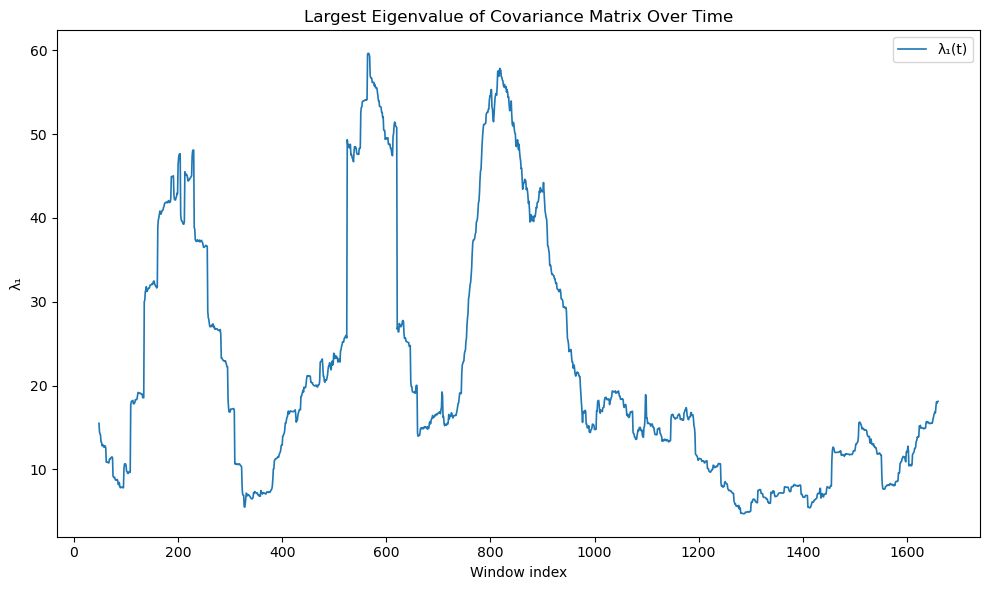

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(t_list, lambda1, label="λ₁(t)", lw=1.2)
plt.title("Largest Eigenvalue of Covariance Matrix Over Time")
plt.xlabel("Window index")
plt.ylabel("λ₁")

plt.legend()
plt.tight_layout()
plt.show()


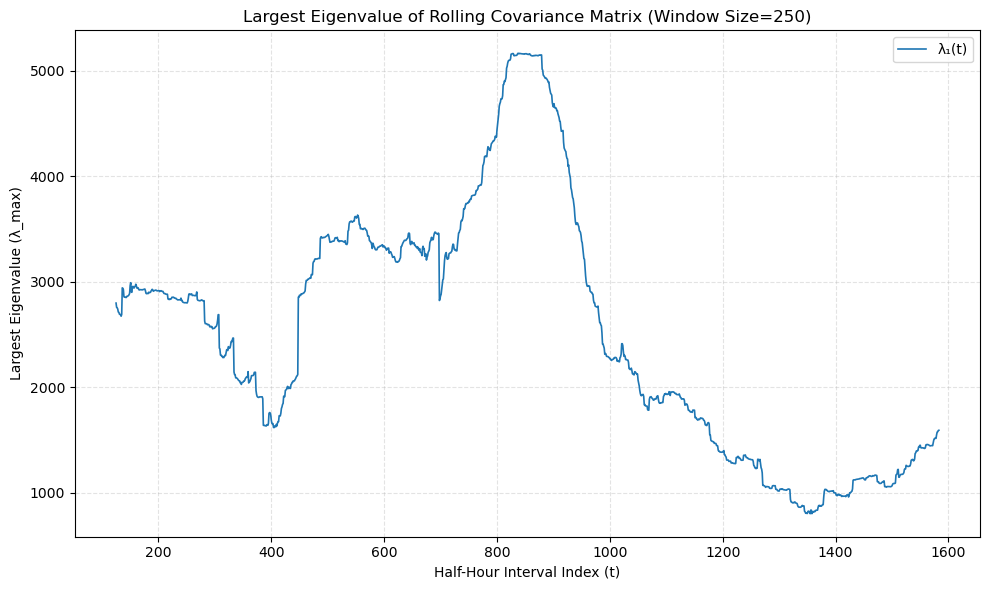

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import norm

df = pd.read_csv('polluteddata.csv', header=None)
X = df.iloc[:, 1:].to_numpy()   # (T, 30)

def rolling_lambda_max(X, W=250, use_corr=False, eps=1e-8):
    """
    X: (T,30) 行为半小时窗口、列为分钟特征
    W: 窗口长度（例如 250）
    use_corr: True 时先对列标准化，再做协方差（等价相关矩阵）
    """
    T, d = X.shape
    if use_corr:
        Xn = (X - X.mean(0)) / (X.std(0) + 1e-12)
    else:
        Xn = X.copy()

    half = W // 2
    t_list, lambdas = [], []
    for t in range(half, T - half):
        Xw = Xn[t-half:t+half] if W % 2 == 0 else Xn[t-half:t+half+1]
        Xw = Xw - Xw.mean(0, keepdims=True)         
        Sigma = (Xw.T @ Xw) / max(1, (len(Xw)-1))   
        Sigma = Sigma + eps * np.eye(d)

        lam = float(np.linalg.eigvalsh(Sigma).max())
        t_list.append(t)
        lambdas.append(lam)
    return np.array(t_list), np.array(lambdas)

t_list, lambdas = rolling_lambda_max(X, W=250, use_corr=False)

plt.figure(figsize=(10,6))
plt.plot(t_list, lambdas, label="λ₁(t)", lw=1.2)
plt.title("Largest Eigenvalue of Rolling Covariance Matrix (Window Size=250)")
plt.xlabel("Half-Hour Interval Index (t)")
plt.ylabel("Largest Eigenvalue (λ_max)")
plt.grid(True, ls='--', alpha=0.35)
plt.legend()
plt.tight_layout()
plt.show()


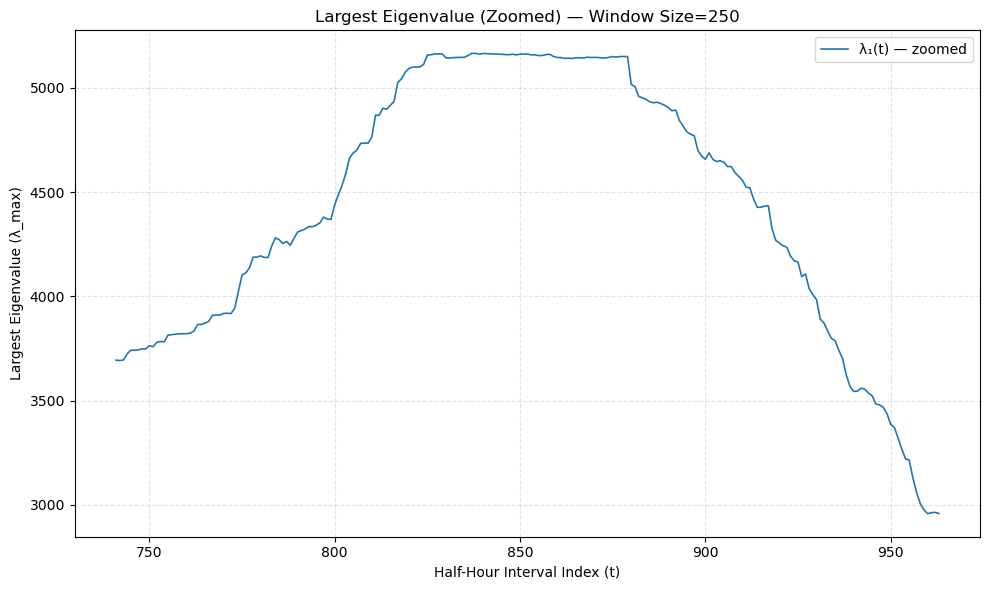

In [ ]:
thr = np.percentile(lambdas, 95)
cand = np.where(lambdas > thr)[0]
t_start = t_list[cand.min()] - 200
t_end   = t_list[cand.max()] + 200
t_start = max(t_start, 0)
t_end   = min(t_end, X.shape[0]-1)

X_sub = X[t_start:t_end+1]
t_sub, lam_sub = rolling_lambda_max(X_sub, W=250, use_corr=False)

t_sub_global = t_sub + t_start

plt.figure(figsize=(10,6))
plt.plot(t_sub_global, lam_sub, label="λ₁(t) — zoomed", lw=1.2)
plt.title("Largest Eigenvalue (Zoomed) — Window Size=250")
plt.xlabel("Half-Hour Interval Index (t)")
plt.ylabel("Largest Eigenvalue (λ_max)")
plt.grid(True, ls='--', alpha=0.35)
plt.legend()
plt.tight_layout()
plt.show()
